## Scenario 6 - Top startups

Given File 'startup_funding.csv'
#### Problem Statement :
1. Find top 5 startups with most amount of total funding.
2. Print the startup name in descending order with respect to amount of funding.
#### Note:
1. Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

### Output Format :
#### city1 percent1
#### city2 percent2
#### city3 percent3
#### . . . 
#### . . .
#### . . .





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("startup_funding.csv")
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### Creating amount and startup arrays to work upon and then converting amount elements from string to integer type

In [3]:
df.AmountInUSD.fillna('0', inplace = True)
df.StartupName.fillna('', inplace = True)

amount = np.array(df.AmountInUSD)
startup = np.array(df.StartupName)

for i in range(len(amount)):
    val = amount[i]
    a = val.split(',')
    currAmt = ''
    for j in a:
        currAmt += j
    amount[i] = int(float(currAmt))
    
amount = np.array(amount, dtype = float)
amount = np.array(amount, dtype = int)
    


### Creating the startup - amount dictionary

In [4]:
print(len(amount))
print(len(startup))

2372
2372


In [5]:
startup_amount = {}
for i in range(len(amount)):
    current_startup = startup[i]
    
    startup_amount[current_startup] = startup_amount.get(current_startup, 0) + amount[i]
    
startup_amount

{'TouchKin': 1300000,
 'Ethinos': 0,
 'Leverage Edu': 0,
 'Zepo': 500000,
 'Click2Clinic': 850000,
 'Billion Loans': 1000000,
 'Ecolibriumenergy': 2600000,
 'Droom': 20000000,
 'Jumbotail': 8500000,
 'Moglix': 16200000,
 'Timesaverz': 1000000,
 'Minjar': 0,
 'MyCity4kids': 0,
 'Clip App': 1000000,
 'Upwardly.in': 0,
 'Autorox.co': 3000000,
 'Fabogo': 2250000,
 'Flickstree': 464000,
 'Design Cafe': 0,
 'Innoviti': 23350000,
 'VDeliver': 0,
 'Bottr.me': 0,
 'Arcatron': 0,
 'QwikSpec': 540000,
 'Chumbak': 1700000,
 'Increff': 2000000,
 'Vayana': 4000000,
 'MObiquest': 0,
 'Ambee': 0,
 'Ideal Insurance': 0,
 'Hypernova Interactive': 0,
 'Rentomojo': 10000000,
 'AirCTO': 0,
 'Playablo': 600000,
 'Trupay': 700000,
 'Brick2Wall': 200000,
 'FableStreet': 0,
 'Monsoon Fintech': 0,
 'MonkeyBox': 0,
 'Noticeboard': 1200000,
 'Byju’s': 160000000,
 'Creator’s Gurukul': 0,
 'Fab Hotels': 25000000,
 'ThinkerBell': 200000,
 '1mg': 30000000,
 'Jhakaas': 155000,
 'BigStylist': 2150000,
 'Gympik.com': 0,

In [6]:
ans = sorted(startup_amount.items(), key = lambda x : x[1], reverse = True)
ans

[('Paytm', 2140000000),
 ('Flipkart', 1559700000),
 ('Ola', 984500000),
 ('Snapdeal', 700000000),
 ('Flipkart.com', 700000000),
 ('Ola Cabs', 515000000),
 ('Olacabs', 400000000),
 ('Oyo Rooms', 350000000),
 ('Quikr', 230000000),
 ('Delhivery', 215000000),
 ('Foodpanda', 210000000),
 ('BigBasket', 207000000),
 ('Paytm Marketplace', 200000000),
 ('MakeMyTrip', 180000000),
 ('Hike', 175000000),
 ('Swiggy', 170500000),
 ('Grofers', 165000000),
 ('Byju’s', 160000000),
 ('CarTrade', 145000000),
 ('FreeCharge', 137000000),
 ('Ecom Express', 137000000),
 ('Pepperfry', 131300000),
 ('Rivigo', 120000000),
 ('Shopclues', 107700000),
 ('Saavn', 100000000),
 ('Fractal Analytics', 100000000),
 ('Oyo', 100000000),
 ('Inmobi', 100000000),
 ('Oyorooms', 100000000),
 ('ShopClues', 100000000),
 ('Mobikwik', 90000000),
 ('practo', 90000000),
 ('YepMe', 88700000),
 ('Practo', 85000000),
 ('Zomato', 85000000),
 ('BookMyShow', 82000000),
 ('Chillr', 76000000),
 ('Meru Cabs', 75000000),
 ('BillDesk', 75000000

### Now we know that we have some of the names written incorrectly. So we need to correct them and then run the program again

In [7]:
df.StartupName.replace('Ola Cabs', 'Ola', inplace = True)
df.StartupName.replace('Olacabs', 'Ola', inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)
df.StartupName.replace('Oyorooms', 'Oyo', inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
df.StartupName.replace('OYO Rooms', 'Oyo', inplace = True)
df.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)

In [8]:
startup = np.array(df.StartupName)
startup_amount = {}
for i in range(len(amount)):
    current_startup = startup[i]
    
    startup_amount[current_startup] = startup_amount.get(current_startup, 0) + amount[i]
    
startup_amount

ans = sorted(startup_amount.items(), key = lambda x : x[1], reverse = True)

ans

[('Paytm', 2340000000),
 ('Flipkart', 2259700000),
 ('Ola', 1899500000),
 ('Snapdeal', 700000000),
 ('Oyo', 637000000),
 ('Quikr', 230000000),
 ('Delhivery', 215000000),
 ('Foodpanda', 210000000),
 ('BigBasket', 207000000),
 ('MakeMyTrip', 180000000),
 ('Hike', 175000000),
 ('Swiggy', 170500000),
 ('Grofers', 165000000),
 ('Byju’s', 160000000),
 ('CarTrade', 145000000),
 ('FreeCharge', 137000000),
 ('Ecom Express', 137000000),
 ('Pepperfry', 131300000),
 ('Rivigo', 120000000),
 ('Shopclues', 107700000),
 ('Saavn', 100000000),
 ('Fractal Analytics', 100000000),
 ('Inmobi', 100000000),
 ('ShopClues', 100000000),
 ('Mobikwik', 90000000),
 ('practo', 90000000),
 ('YepMe', 88700000),
 ('Practo', 85000000),
 ('Zomato', 85000000),
 ('BookMyShow', 82000000),
 ('Chillr', 76000000),
 ('Meru Cabs', 75000000),
 ('BillDesk', 75000000),
 ('Ace2three', 73700000),
 ('Blackbuck', 70000000),
 ('Urban Ladder', 65200000),
 ('Infogain', 63000000),
 ('UrbanClap', 60700000),
 ('Lenskart', 60000000),
 ('BankB

In [9]:
ans = ans[:5]
ans

[('Paytm', 2340000000),
 ('Flipkart', 2259700000),
 ('Ola', 1899500000),
 ('Snapdeal', 700000000),
 ('Oyo', 637000000)]

### Creating a Pie chart with the percentage of amount in each startup (Among the top 5 startups)

In [10]:
total = 0
for i in ans:
    total += i[1]
    
percentage = []
startups = []
for i in range(5):
    percentage.append((ans[i][1] / total ) * 100)
    startups.append(ans[i][0])
    
print(startups)
print(percentage)

['Paytm', 'Flipkart', 'Ola', 'Snapdeal', 'Oyo']
[29.861412419284854, 28.836681044383756, 24.240065337791275, 8.932901151068119, 8.128940047471989]


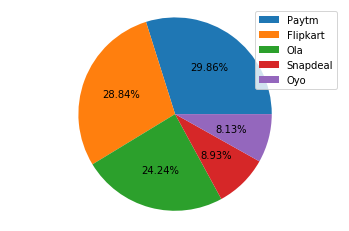

In [11]:
plt.pie(percentage, autopct = "%.2f%%")
plt.axis("equal")
plt.legend(startups)

plt.show()